In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm


In [2]:
energy_efficiency = pd.read_csv('EnergyEfficiency.csv', sep=',')
energy_efficiency.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

The hand-in exercises for this topic is Exercise 1 and 2 from the notebook “Exercises in
linear regression.ipynb”.

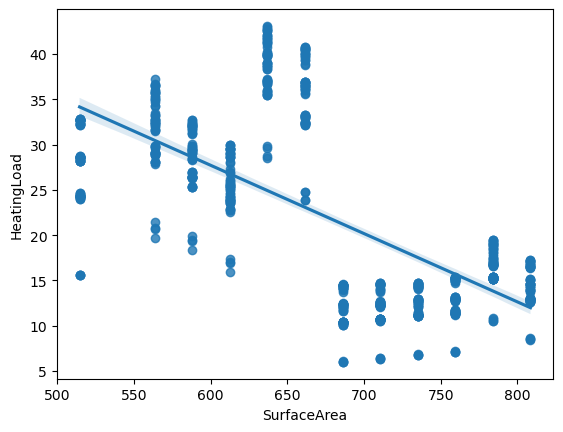

In [3]:
ax = sns.regplot(energy_efficiency, x='SurfaceArea', y='HeatingLoad')

In [4]:
stats.pearsonr(energy_efficiency['SurfaceArea'], energy_efficiency['HeatingLoad'])

PearsonRResult(statistic=np.float64(-0.6581202267776216), pvalue=np.float64(1.6869072902148846e-96))

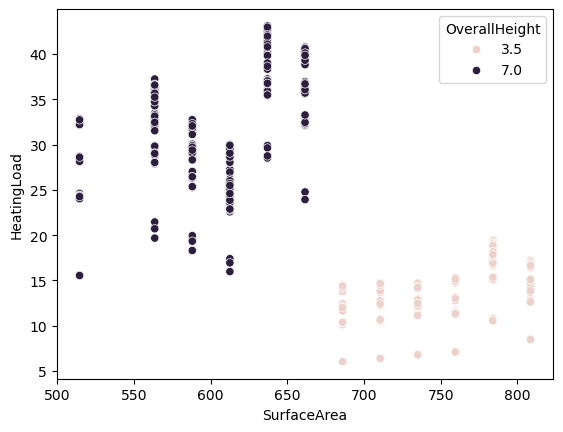

In [5]:
ax = sns.scatterplot(energy_efficiency, x='SurfaceArea', y='HeatingLoad',hue = 'OverallHeight')


In [6]:
x = energy_efficiency['SurfaceArea']
y = energy_efficiency['HeatingLoad']

x = sm.add_constant(x)

linreg_model = sm.OLS(y,x).fit()
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.69e-96
Time:                        12:41:30   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?

It assumes that the heating load goees down by 0.07. Which seems wrong

6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.


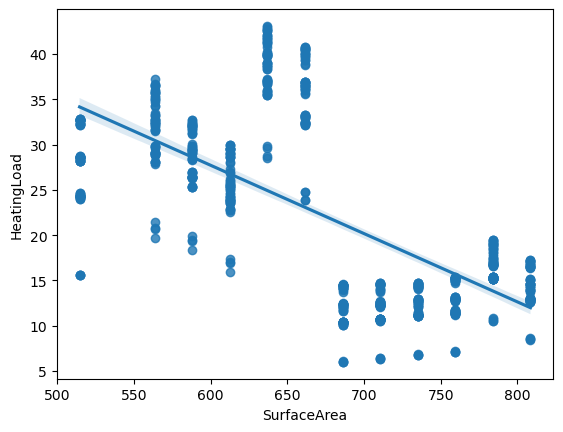

In [7]:
ax = sns.regplot(energy_efficiency, x='SurfaceArea', y='HeatingLoad')

In [8]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.69e-96
Time:                        12:41:31   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

R-Squared is 0.43 which means that there is 43 percent in variance in heating load by the variance in surface area.

Pvalue is on 0 for surface area meaning that we can asume that relationship is statistically significant between surface area and heating, and we can reject the null hypothesis.


## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

In [9]:
energy_efficiency.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:
X_vars = energy_efficiency[['SurfaceArea', 'OverallHeight', 'RoofArea', 'GlazingArea']]
X_vars

,SurfaceArea,OverallHeight,RoofArea,GlazingArea
0,514.5,7.0,110.25,0.0
1,514.5,7.0,110.25,0.0
2,514.5,7.0,110.25,0.0
3,514.5,7.0,110.25,0.0
4,563.5,7.0,122.50,0.0
...,...,...,...,...
763,784.0,3.5,220.50,0.4
764,808.5,3.5,220.50,0.4
765,808.5,3.5,220.50,0.4
766,808.5,3.5,220.50,0.4


In [11]:
Y_var = energy_efficiency['HeatingLoad']
Y_var

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: HeatingLoad, Length: 768, dtype: float64

In [12]:
X_vars_int = sm.add_constant(X_vars)

In [13]:
X_vars_int

,const,SurfaceArea,OverallHeight,RoofArea,GlazingArea
0,1.0,514.5,7.0,110.25,0.0
1,1.0,514.5,7.0,110.25,0.0
2,1.0,514.5,7.0,110.25,0.0
3,1.0,514.5,7.0,110.25,0.0
4,1.0,563.5,7.0,122.50,0.0
...,...,...,...,...,...
763,1.0,784.0,3.5,220.50,0.4
764,1.0,808.5,3.5,220.50,0.4
765,1.0,808.5,3.5,220.50,0.4
766,1.0,808.5,3.5,220.50,0.4


In [14]:
multireg_model = sm.OLS(Y_var, X_vars_int).fit()

In [15]:
multireg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     1950.
Date:                Wed, 12 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:41:31   Log-Likelihood:                -1936.1
No. Observations:                 768   AIC:                             3882.
Df Residuals:                     763   BIC:                             3905.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -33.6178      3.375     -9.960      0.000     -40.244     -26.992
SurfaceArea       0.0523      0.003     20.019      0.000       0.047       0.057
OverallHeight     5.5304      0.267     20.678      0.000       5.005       6.055
RoofArea         -0.0739      0.011     -6.574      0.000      -0.096      -0.052
GlazingArea      20.4379      0.819     24.969      0.000      18.831      22.045
==============================================================================
Omnibus:                       14.112   Durbin-Watson:                   0.580
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.315
Skew:                           0.022   Prob(JB):                     3.18e-06
Kurtosis:                       3.888   Cond. No.                     2.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
np.sqrt(np.mean(linreg_model.resid**2))

np.float64(7.592090475900786)

In [17]:
np.mean(np.abs(multireg_model.resid))

np.float64(2.1990249345089237)

In [18]:
np.mean(multireg_model.resid**2)

np.float64(9.060731302176016)

In [19]:
np.sqrt(np.mean(multireg_model.resid**2))

np.float64(3.0101048656443874)

In [20]:
pred_y = multireg_model.predict(X_vars_int)

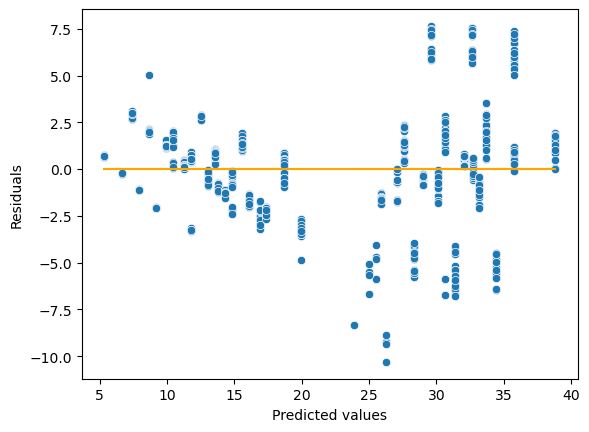

In [21]:
sns.scatterplot(x = pred_y, y = multireg_model.resid)
plt.plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

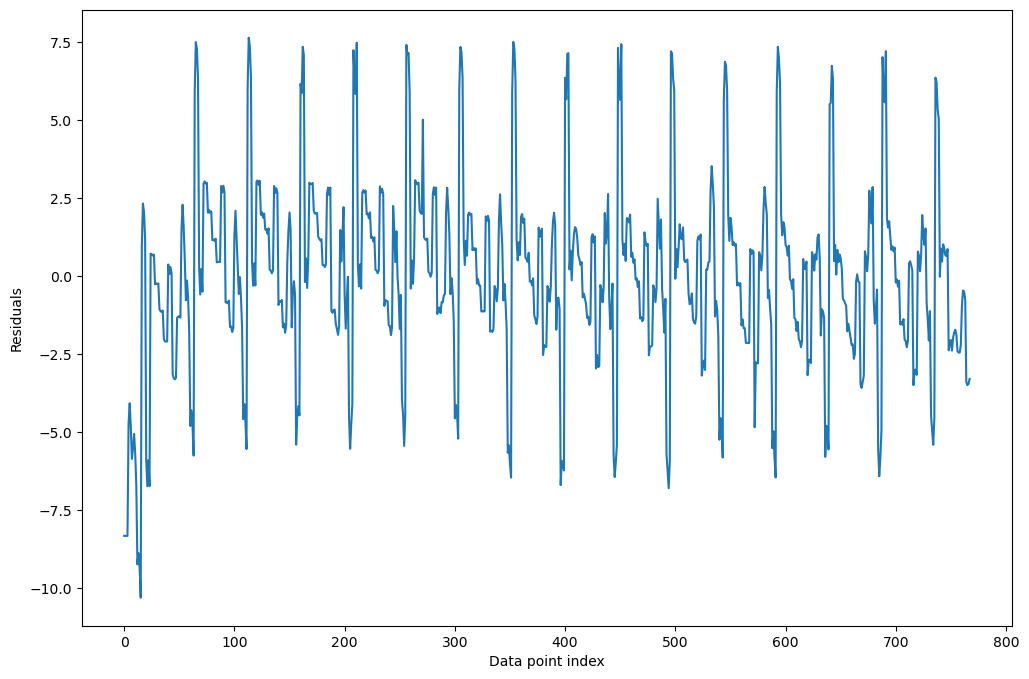

In [22]:
plt.rc("figure", figsize=(12, 8))
sns.lineplot(x = range(0,len(multireg_model.resid)), y = multireg_model.resid)
plt.ylabel("Residuals")
plt.xlabel("Data point index")
plt.show()

In [23]:
X_vars.corr()

,SurfaceArea,OverallHeight,RoofArea,GlazingArea
SurfaceArea,1.000000e+00,-8.581477e-01,8.807195e-01,3.623317e-15
OverallHeight,-8.581477e-01,1.000000e+00,-9.725122e-01,-1.977685e-16
RoofArea,8.807195e-01,-9.725122e-01,1.000000e+00,-1.753224e-15
GlazingArea,3.623317e-15,-1.977685e-16,-1.753224e-15,1.000000e+00
